# Data Dictionary

ID: An identifier for each record in the dataset.  
Customer_ID: Identifier for individual customers.  
Month: The month associated with the data entry.  
Name: Customer's name.  
Age: Customer's age.  
SSN: Social Security Number or some other form of identification.  
Occupation: Customer's occupation or job title.  
Annual_Income: Customer's annual income.
Monthly_Inhand_Salary: The amount of money the customer receives as salary on a monthly basis.  
Num_Bank_Accounts: Number of bank accounts the customer has.  
Num_Credit_Card: Number of credit cards the customer possesses.  
Interest_Rate: The interest rate associated with some financial aspect (e.g., loans or credit cards).  
Num_of_Loan: Number of loans the customer has.  
Type_of_Loan: The type of loan(s) the customer has (e.g., mortgage, personal loan, etc.).  
Delay_from_due_date: Delay in payments from the due date.  
Num_of_Delayed_Payment: Number of delayed payments.  
Changed_Credit_Limit: Indicates if the customer has changed their credit limit.  
Num_Credit_Inquiries: Number of credit inquiries made by the customer.  
Credit_Mix: The mix of different types of credit accounts (e.g., credit cards, loans).  
Outstanding_Debt: The amount of outstanding debt.  
Credit_Utilization_Ratio: The ratio of credit used to the total credit limit.  
Credit_History_Age: The age of the customer's credit history.  
Payment_of_Min_Amount: Payment behavior regarding minimum required payments.  
Total_EMI_per_month: Total Equated Monthly Installment (EMI) payments made by the customer.  
Amount_invested_monthly: The amount the customer invests on a monthly basis.  
Payment_Behaviour: Behavior related to payments, possibly indicating patterns or trends.  
Monthly_Balance: The customer's monthly balance in their financial accounts.  
Credit_Score: The credit score associated with the customer's creditworthiness.  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, re, joblib
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from scipy.stats import probplot, stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
data = pd.read_csv("train.csv" , sep = "," , encoding = 'utf-8',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 100000
Number of columns: 28


There are different data types in our raw data. As we know some of the columns corresponds to numeric values but due to presence of some missing values and discrepancy in data they are stored as string. Such as Age, Balance and son on. The below table demonstrates the initial data types in raw dataset. In the following steps we performed some data transformations in order to address this issue and convert numeric columns to numeric values.

In [ ]:
data_types = data.dtypes
data_types

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
# data=pd.read_csv('Data_after_handling_outliers.csv')

# Unique Values and their missing values

In [ ]:
descriptive_stats = data.describe()
missing_percentage = (data.isnull().mean() * 100).round(2)
unique_counts = data.nunique()

# Create a new DataFrame to store the results
stats_df = pd.DataFrame({
    'Missing Percentage': missing_percentage,
    'Unique Value Count': unique_counts
})



stats_df

,Missing Percentage,Unique Value Count
ID,0.00,100000
Customer_ID,0.00,12500
Month,0.00,8
Name,9.98,10139
Age,0.00,1788
SSN,5.57,12500
Occupation,7.06,15
Annual_Income,0.00,18940
Monthly_Inhand_Salary,15.00,13235
Num_Bank_Accounts,0.00,943


In [ ]:
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,97909.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,10.389025,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,6.789496,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,-6.490000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,5.320000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,9.400000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,14.870000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,36.970000,2597.000000,50.000000,82331.000000


In [ ]:
data.describe(include='object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,94428,92938,100000,100000,88592,92998,79805,100000,90970,100000,95521,92400,98800,100000
unique,100000,12500,8,10139,1788,12500,15,18940,434,6260,749,3,13178,404,3,91049,6,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,078-73-5990,Lawyer,36585.12,3,Not Specified,19,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,8,6575,16,14386,1408,5327,36479,24,446,52326,4305,25513,9,53174


In [ ]:
data['Age'].value_counts()

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64

Some of the features that are initially stored as Object variables, need to be converted to Numeric as they corresponds to Numeric Values as they corresponds to actual numeric values.
For example for the below features we converted them into Numeric Values:


In [ ]:
features_to_be_num=['Age','Num_of_Loan']
for feature in features_to_be_num:
    data[feature] = data[feature].str.extract('(\d+)').astype(int)

In [ ]:
data['Num_of_Loan']

0        4
1        4
2        4
3        4
4        4
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Num_of_Loan, Length: 100000, dtype: int32

Some of the features that are initially stored as Object variables, need to be converted to Numeric as they corresponds to Numeric Values as they corresponds to actual numeric values.
For example for the below features we converted them into Numeric Values:


In [ ]:
# changing the features that needs to be numeric
features_to_be_num=['Outstanding_Debt','Annual_Income','Amount_invested_monthly','Monthly_Balance']
for feature in features_to_be_num:
    data[feature] = data[feature].str.extract(r'(\d+\.\d+)').astype(float)

In [ ]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)

In [ ]:
# descriptive after transformation
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,91216.000000,97123.000000
mean,119.509700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.946268,10.389025,27.754251,1426.220376,32.285173,1403.118217,195.539456,402.164483
std,684.757313,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.028754,6.789496,193.177339,1155.129026,5.116875,8306.041270,199.564527,213.644217
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,25.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,72.236692,269.998334
50%,34.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,128.954538,336.472111
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,236.815814,469.652004
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


In [ ]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [ ]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int32
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

# Missing Value Handling

In [ ]:
# We will replace missing values for SSN and Name with available data for the same Customer_ID

In [ ]:
data[(data['Name'].isnull()) | (data['SSN'].isnull())]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,August,NaN,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.860384,High_spent_Small_value_payments,998.869297,Good
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.174163,High_spent_Small_value_payments,968.555517,Standard
29,0x162b,CUS_0xb891,June,Jasond,55,NaN,NaN,30689.89,2612.490833,2,...,NaN,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
51,0x164d,CUS_0x284a,April,Nadiaq,34,NaN,Lawyer,131313.40,10469.207759,0,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.434956,High_spent_Medium_value_payments,899.198772,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99968,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44,NaN,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,39.868572,NaN,NM,41.113561,52.951978,High_spent_Small_value_payments,NaN,Good
99969,0x25fc3,CUS_0xf16,February,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.646237,High_spent_Small_value_payments,NaN,Good
99973,0x25fc7,CUS_0xf16,June,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,NaN,Low_spent_Small_value_payments,NaN,Good
99986,0x25fdc,CUS_0x8600,March,NaN,28,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.70,24.713861,5 Years and 10 Months,Yes,60.964772,76.282793,Low_spent_Small_value_payments,NaN,Poor


In [ ]:
data[data['Customer_ID']=='CUS_0xd40'][['Customer_ID','Name','SSN']]

,Customer_ID,Name,SSN
0,CUS_0xd40,Aaron Maashoh,821-00-0265
1,CUS_0xd40,Aaron Maashoh,821-00-0265
2,CUS_0xd40,Aaron Maashoh,821-00-0265
3,CUS_0xd40,Aaron Maashoh,821-00-0265
4,CUS_0xd40,Aaron Maashoh,821-00-0265
5,CUS_0xd40,Aaron Maashoh,821-00-0265
6,CUS_0xd40,Aaron Maashoh,821-00-0265
7,CUS_0xd40,NaN,NaN


## For 'Name'

In [ ]:
Customer_IDs = data[data['Name'].isnull()]['Customer_ID'].values
Customer_IDs

array(['CUS_0xd40', 'CUS_0x2dbc', 'CUS_0x2dbc', ..., 'CUS_0xf16',
       'CUS_0xf16', 'CUS_0x8600'], dtype=object)

In [ ]:
# fill missing values
for id in Customer_IDs:
    # get real name by customer id
    realName = ''
    realName = data.loc[(data['Customer_ID'] == id) & (data['Name'].notna())]['Name'].values[0]
    # fill missing value
    data.loc[(data['Customer_ID'] == id) & (data['Name'].isna()), ['Name']] = realName

In [ ]:
# check the Name column
data['Name'].isnull().value_counts()

Name
False    100000
Name: count, dtype: int64

## For 'SSN'

In [ ]:
# Replace missing 'SSN' values with corresponding 'Customer_IDs'
Customer_IDs = data[data['SSN'].isnull()]['Customer_ID'].values

In [ ]:
# fill missing values
for id in Customer_IDs:
    # get real name by customer id
    realName = ''
    realName = data.loc[(data['Customer_ID'] == id) & (data['SSN'].notna())]['SSN'].values[0]
    # fill missing value
    data.loc[(data['Customer_ID'] == id) & (data['SSN'].isna()), ['SSN']] = realName

In [ ]:
data[(data['Name'].isnull()) | (data['SSN'].isnull())]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## For Occupation

In [ ]:
# We will replace missing values of Occupation from available data of the same CustomerID in other rows

In [ ]:
# Step 1: Find unique 'CustomerID' with missing values in 'Occupation'
missing_customers = data[data['Occupation'].isnull()]['Customer_ID'].unique()

# Step 2: Calculate the mode of 'Occupation' for each of those 'CustomerID'
modes = data.groupby('Customer_ID')['Occupation'].apply(lambda x: x.mode().iloc[0] if not x.mode()
                                                        .empty else None)

# Step 3: Replace missing values with the corresponding mode
for customer_id in missing_customers:
    mode = modes.get(customer_id)
    if mode is not None:
        data.loc[(data['Customer_ID'] == customer_id) & (data['Occupation'].isnull()), 'Occupation'] = mode


In [ ]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              2877
Credit_Score                    0
dtype: int64

## For 'Type_of_Loan'

In [ ]:
data[data['Type_of_Loan'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.0,276.725394,NaN,288.605522,Standard
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,35547.71,NaN,7,...,Standard,943.86,27.020360,30 Years and 9 Months,NM,0.0,74.443641,High_spent_Medium_value_payments,460.887276,Standard
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,Standard,943.86,23.462303,30 Years and 10 Months,Yes,0.0,173.138651,Low_spent_Medium_value_payments,392.192266,Standard
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,NaN,943.86,28.924954,30 Years and 11 Months,Yes,0.0,96.785485,High_spent_Medium_value_payments,438.545432,Standard
36,0x1636,CUS_0x1cdb,May,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,NaN,943.86,41.776187,31 Years and 0 Months,Yes,0.0,62.723278,High_spent_Small_value_payments,482.607638,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,0x25f95,CUS_0xad4f,April,Sabina Zawadzkig,47,226-45-0652,Developer,22620.79,1722.065833,7,...,NaN,642.46,26.730863,29 Years and 6 Months,NM,0.0,205.756074,Low_spent_Small_value_payments,NaN,Poor
99940,0x25f96,CUS_0xad4f,May,Sabina Zawadzkig,47,226-45-0652,Developer,22620.79,1722.065833,7,...,Standard,642.46,37.450793,29 Years and 7 Months,No,0.0,141.895743,Low_spent_Large_value_payments,NaN,Standard
99941,0x25f97,CUS_0xad4f,June,Sabina Zawadzkig,47,226-45-0652,Developer,22620.79,1722.065833,7,...,Standard,642.46,27.699504,NaN,No,0.0,207.473456,Low_spent_Small_value_payments,NaN,Poor
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,226-45-0652,Developer,22620.79,1722.065833,6,...,Standard,642.46,24.714779,29 Years and 9 Months,No,0.0,16.532189,High_spent_Large_value_payments,NaN,Poor


In [ ]:
data[data['Customer_ID']=='CUS_0xad4f']['Type_of_Loan']

99936    NaN
99937    NaN
99938    NaN
99939    NaN
99940    NaN
99941    NaN
99942    NaN
99943    NaN
Name: Type_of_Loan, dtype: object

In [ ]:
# Replace Missing with 'Not Specified'
replacement_value = 'Not Specified'
data['Type_of_Loan'].fillna(replacement_value, inplace=True)

In [ ]:
data['Type_of_Loan'].isna().sum()

0

## For 'Changed_Credit_Limit'

In [ ]:
data[data['Changed_Credit_Limit'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.120,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
65,0x1663,CUS_0x4157,February,Charlie Zhur,23,070-19-1622,Doctor,114838.410,9843.867500,2,...,Good,1377.74,27.626325,21 Years and 5 Months,NM,226.892792,212.235602,High_spent_Large_value_payments,785.258356,Good
66,0x1664,CUS_0x4157,March,Charlie Zhur,23,070-19-1622,Doctor,114838.410,NaN,2,...,Good,1377.74,35.141567,21 Years and 6 Months,NM,226.892792,470.385796,High_spent_Small_value_payments,547.108162,Good
109,0x16a3,CUS_0x6c66,June,Sinead Carews,39,328-33-6328,Manager,8701.545,519.128750,6,...,Standard,2602.69,28.570031,9 Years and 4 Months,Yes,36.548197,52.931613,Low_spent_Medium_value_payments,242.433064,Poor
110,0x16a4,CUS_0x6c66,July,Sinead Carews,39,328-33-6328,Manager,8701.545,NaN,6,...,Standard,2602.69,38.465415,NaN,Yes,36.548197,30.471806,Low_spent_Medium_value_payments,264.892872,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99548,0x25d4a,CUS_0x2637,May,Diane Bartzj,28,272-33-1370,Writer,29090.500,2472.208333,5,...,NaN,1612.70,26.151395,16 Years and 2 Months,Yes,67.439731,35.401299,High_spent_Medium_value_payments,NaN,Poor
99618,0x25db4,CUS_0xae66,March,Jino,7490,721-45-4479,Writer,142560.360,11773.030000,6,...,Standard,220.75,35.576245,17 Years and 5 Months,No,76.772094,194.787477,High_spent_Large_value_payments,NaN,Standard
99800,0x25ec6,CUS_0x1232,January,Lawderr,16,441-26-1297,Developer,14937.490,NaN,8,...,Bad,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.586933,Low_spent_Small_value_payments,NaN,Standard
99892,0x25f4e,CUS_0x89aa,May,Kwokw,38,018-63-7005,Manager,85744.120,NaN,6,...,Standard,717.79,29.513156,NaN,Yes,72.099176,88.010458,High_spent_Large_value_payments,NaN,Standard


In [ ]:
# look into values for Changed_Credit_Limit
data['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
 8.22     133
 11.50    127
 11.32    126
 10.06    121
 7.35     121
         ... 
 31.56      1
 32.56      1
 20.66      1
-0.72       1
 21.17      1
Name: count, Length: 4375, dtype: int64

In [ ]:
# look into a sample customer that has missing value for Changed_Credit_Limit
data[data['Customer_ID']=='CUS_0xd40']['Changed_Credit_Limit']

0    11.27
1    11.27
2      NaN
3     6.27
4    11.27
5     9.27
6    11.27
7    11.27
Name: Changed_Credit_Limit, dtype: float64

In [ ]:
#Another sample
data[data['Customer_ID']=='CUS_0xae66']['Changed_Credit_Limit']

99616    11.22
99617     7.22
99618      NaN
99619    11.22
99620    11.22
99621    11.22
99622    11.22
99623    11.22
Name: Changed_Credit_Limit, dtype: float64

In [ ]:
# For Each customer who have a missing value in changed_credit_limit, we will replace that value
# with a mode of that customer's changed_credit_limit


In [ ]:
# Step 1: Find unique 'CustomerID' with missing values in 'Credit_Limit'
missing_credit_limit_customers = data[data['Changed_Credit_Limit'].isnull()]['Customer_ID'].unique()

# Step 2: Calculate the mode of 'Credit_Limit' for each of those 'CustomerID'
modes = data.groupby('Customer_ID')['Changed_Credit_Limit'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 3: Replace missing values with the corresponding mode
for customer_id in missing_credit_limit_customers:
    mode = modes.get(customer_id)
    if mode is not None:
        data.loc[(data['Customer_ID'] == customer_id) & (data['Changed_Credit_Limit'].isnull()), 'Changed_Credit_Limit'] = mode


In [ ]:
#Looking to first sample to check the missing value is replaced with MODE
data[data['Customer_ID']=='CUS_0xae66']['Changed_Credit_Limit']

99616    11.22
99617     7.22
99618    11.22
99619    11.22
99620    11.22
99621    11.22
99622    11.22
99623    11.22
Name: Changed_Credit_Limit, dtype: float64

In [ ]:
# Second sample
data[data['Customer_ID']=='CUS_0xd40']['Changed_Credit_Limit']

0    11.27
1    11.27
2    11.27
3     6.27
4    11.27
5     9.27
6    11.27
7    11.27
Name: Changed_Credit_Limit, dtype: float64

## For Num_Credit_Inquiries

In [ ]:
data['Num_Credit_Inquiries'].value_counts()

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: count, Length: 1223, dtype: int64

In [ ]:
#Look into data points that have missing value for Num_Credit_Inquiries
data[data['Num_Credit_Inquiries'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,Engineer,143162.640,NaN,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,NaN,High_spent_Small_value_payments,715.741367,Good
47,0x1645,CUS_0x95ee,August,Np,31,612-70-8987,Lawyer,73928.460,5988.705000,4,...,Good,548.20,31.580990,32 Years and 6 Months,No,0.000000,42.635590,NaN,796.234910,Good
113,0x16ab,CUS_0xff4,February,Poornimaf,500,655-05-7666,Entrepreneur,25546.260,NaN,8,...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.323232,Low_spent_Small_value_payments,129.933631,Standard
115,0x16ad,CUS_0xff4,April,Poornimaf,37,655-05-7666,Entrepreneur,25546.260,2415.855000,8,...,Standard,758.44,35.946278,18 Years and 5 Months,Yes,101.328637,83.714750,High_spent_Medium_value_payments,306.542112,Standard
187,0x1719,CUS_0x5b48,April,McBrideq,32,706-95-0150,Lawyer,12600.445,782.037083,5,...,Standard,569.80,28.819407,12 Years and 6 Months,Yes,33746.000000,31.149198,Low_spent_Medium_value_payments,300.994163,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99768,0x25e96,CUS_0xc345,January,Jeb Blountf,23,176-40-0757,Architect,60015.320,NaN,7,...,Standard,1095.15,29.272858,15 Years and 2 Months,Yes,13580.000000,136.685509,High_spent_Medium_value_payments,NaN,Standard
99852,0x25f12,CUS_0x3048,May,Rick Rothackeru,40,375-64-6913,Scientist,81093.160,7017.763333,10,...,Bad,4523.30,27.419316,9 Years and 9 Months,Yes,409.039442,741.567333,Low_spent_Small_value_payments,NaN,Standard
99874,0x25f34,CUS_0x3855,March,Xolai,27,963-55-7106,Scientist,118677.540,9963.795000,4,...,NaN,995.47,32.808662,NaN,No,237.106366,NaN,High_spent_Medium_value_payments,NaN,Good
99900,0x25f5a,CUS_0x4986,May,Charles Abbotta,33,971-61-8388,Entrepreneur,41329.560,3421.130000,2,...,NaN,1245.01,35.367709,NaN,No,20.553577,126.576130,Low_spent_Medium_value_payments,NaN,Good


In [ ]:
data[data['Customer_ID']=='CUS_0x2dbc']['Num_Credit_Inquiries']

16    3.0
17    3.0
18    NaN
19    3.0
20    3.0
21    3.0
22    3.0
23    3.0
Name: Num_Credit_Inquiries, dtype: float64

In [ ]:
data[data['Customer_ID']=='CUS_0x95ee']['Num_Credit_Inquiries']

40    2.0
41    2.0
42    2.0
43    2.0
44    2.0
45    2.0
46    2.0
47    NaN
Name: Num_Credit_Inquiries, dtype: float64

In [ ]:
# We do the same method for this: Replace with the mode for each CustomerID


In [ ]:
# Step 1: Find unique 'CustomerID' with missing values in 'Credit_Limit'
missing_credit_limit_customers = data[data['Num_Credit_Inquiries'].isnull()]['Customer_ID'].unique()

# Step 2: Calculate the mode of 'Credit_Limit' for each of those 'CustomerID'
modes = data.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 3: Replace missing values with the corresponding mode
for customer_id in missing_credit_limit_customers:
    mode = modes.get(customer_id)
    if mode is not None:
        data.loc[(data['Customer_ID'] == customer_id) & (data['Num_Credit_Inquiries'].isnull()), 'Num_Credit_Inquiries'] = mode


In [ ]:
# Chcek the transfomartion for sample data
data[data['Customer_ID']=='CUS_0x95ee']['Num_Credit_Inquiries']

40    2.0
41    2.0
42    2.0
43    2.0
44    2.0
45    2.0
46    2.0
47    2.0
Name: Num_Credit_Inquiries, dtype: float64

In [ ]:
# check if all missing values are addressed
data['Num_Credit_Inquiries'].isnull().sum()


0

## For Credit_Mix

In [ ]:
data[data['Credit_Mix'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,NaN,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,NaN,1303.01,39.501648,NaN,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.513411,Good
29,0x162b,CUS_0xb891,June,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,NaN,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,NaN,943.86,28.924954,30 Years and 11 Months,Yes,0.000000,96.785485,High_spent_Medium_value_payments,438.545432,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,0x25fde,CUS_0x8600,May,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,NaN,3571.70,28.508250,6 Years and 0 Months,Yes,60.964772,213.978010,Low_spent_Small_value_payments,NaN,Standard
99992,0x25fe6,CUS_0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.196481,Low_spent_Small_value_payments,NaN,Poor
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor


In [ ]:
data[data['Customer_ID']=='CUS_0xd40']['Credit_Mix']

0     NaN
1    Good
2    Good
3    Good
4    Good
5    Good
6    Good
7    Good
Name: Credit_Mix, dtype: object

In [ ]:
data[data['Customer_ID']=='CUS_0xb891']['Credit_Mix']

24    Good
25    Good
26    Good
27    Good
28    Good
29     NaN
30    Good
31    Good
Name: Credit_Mix, dtype: object

In [ ]:
data[data['Customer_ID']=='CUS_0x942c']['Credit_Mix']

99992     NaN
99993    Good
99994     NaN
99995     NaN
99996     NaN
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, dtype: object

In [ ]:
# Do the same approach

In [ ]:
# Step 1: Find unique 'CustomerID' with missing values in 'Credit_Limit'
missing_credit_limit_customers = data[data['Credit_Mix'].isnull()]['Customer_ID'].unique()

# Step 2: Calculate the mode of 'Credit_Limit' for each of those 'CustomerID'
modes = data.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 3: Replace missing values with the corresponding mode
for customer_id in missing_credit_limit_customers:
    mode = modes.get(customer_id)
    if mode is not None:
        data.loc[(data['Customer_ID'] == customer_id) & (data['Credit_Mix'].isnull()), 'Credit_Mix'] = mode


In [ ]:
data[data['Customer_ID']=='CUS_0x942c']['Credit_Mix']

99992    Good
99993    Good
99994    Good
99995    Good
99996    Good
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, dtype: object

In [ ]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              2877
Credit_Score                    0
dtype: int64

## For 'Monthly_Inhand_Salary'

In [ ]:
data[data['Monthly_Inhand_Salary'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,0x25f9e,CUS_0x51b3,January,Ryana,33,837-85-9800,Media_Manager,59146.36,NaN,2,...,Good,418.03,34.720661,NaN,No,26.778419,606.436542,Low_spent_Small_value_payments,NaN,Standard
99955,0x25fad,CUS_0x2084,April,Ryanl,21,253-72-7758,Architect,38321.39,NaN,4,...,Good,678.57,35.455305,17 Years and 2 Months,No,362.072453,293.713193,Low_spent_Large_value_payments,NaN,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,500,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,High_spent_Large_value_payments,NaN,Standard
99975,0x25fc9,CUS_0xf16,August,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,NaN,1,...,Good,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,NaN,Good


In [ ]:
data[data['Customer_ID']=='CUS_0xd40']['Monthly_Inhand_Salary']

0    1824.843333
1            NaN
2            NaN
3            NaN
4    1824.843333
5            NaN
6    1824.843333
7    1824.843333
Name: Monthly_Inhand_Salary, dtype: float64

In [ ]:
data[data['Customer_ID']=='CUS_0x21b1']['Monthly_Inhand_Salary']

8     3037.986667
9     3037.986667
10    3037.986667
11            NaN
12    3037.986667
13    3037.986667
14            NaN
15    3037.986667
Name: Monthly_Inhand_Salary, dtype: float64

In [ ]:
# Step 1: Find unique 'CustomerID' with missing values in 'Credit_Limit'
missing_credit_limit_customers = data[data['Monthly_Inhand_Salary'].isnull()]['Customer_ID'].unique()

# Step 2: Calculate the mode of 'Credit_Limit' for each of those 'CustomerID'
modes = data.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 3: Replace missing values with the corresponding mode
for customer_id in missing_credit_limit_customers:
    mode = modes.get(customer_id)
    if mode is not None:
        data.loc[(data['Customer_ID'] == customer_id) & (data['Monthly_Inhand_Salary'].isnull()), 'Monthly_Inhand_Salary'] = mode


## For Amount_invested_monthly

In [ ]:
# Step 1: Find unique 'CustomerID' with missing values in 'Credit_Limit'
missing_credit_limit_customers = data[data['Amount_invested_monthly'].isnull()]['Customer_ID'].unique()

# Step 2: Calculate the mode of 'Credit_Limit' for each of those 'CustomerID'
modes = data.groupby('Customer_ID')['Amount_invested_monthly'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 3: Replace missing values with the corresponding mode
for customer_id in missing_credit_limit_customers:
    mode = modes.get(customer_id)
    if mode is not None:
        data.loc[(data['Customer_ID'] == customer_id) & (data['Amount_invested_monthly'].isnull()), 'Amount_invested_monthly'] = mode


## For Payment_Behaviour

In [ ]:
# Step 1: Find unique 'CustomerID' with missing values in 'Credit_Limit'
missing_credit_limit_customers = data[data['Payment_Behaviour'].isnull()]['Customer_ID'].unique()

# Step 2: Calculate the mode of 'Credit_Limit' for each of those 'CustomerID'
modes = data.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 3: Replace missing values with the corresponding mode
for customer_id in missing_credit_limit_customers:
    mode = modes.get(customer_id)
    if mode is not None:
        data.loc[(data['Customer_ID'] == customer_id) & (data['Payment_Behaviour'].isnull()), 'Payment_Behaviour'] = mode


# For Num_of_Delayed_Payment

In [ ]:
#Same approach
# Step 1: Find unique 'CustomerID' with missing values in 'Credit_Limit'
missing_credit_limit_customers = data[data['Num_of_Delayed_Payment'].isnull()]['Customer_ID'].unique()

# Step 2: Calculate the mode of 'Credit_Limit' for each of those 'CustomerID'
modes = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 3: Replace missing values with the corresponding mode
for customer_id in missing_credit_limit_customers:
    mode = modes.get(customer_id)
    if mode is not None:
        data.loc[(data['Customer_ID'] == customer_id) & (data['Num_of_Delayed_Payment'].isnull()), 'Num_of_Delayed_Payment'] = mode


## For Credit_History_Age

In [ ]:
data[data['Customer_ID']=='CUS_0xd40'][['Customer_ID','Credit_History_Age']]

,Customer_ID,Credit_History_Age
0,CUS_0xd40,22 Years and 1 Months
1,CUS_0xd40,NaN
2,CUS_0xd40,22 Years and 3 Months
3,CUS_0xd40,22 Years and 4 Months
4,CUS_0xd40,22 Years and 5 Months
5,CUS_0xd40,22 Years and 6 Months
6,CUS_0xd40,22 Years and 7 Months
7,CUS_0xd40,NaN


In [ ]:
# Step 1: Find unique 'CustomerID' with missing values in 'Credit_Limit'
missing_credit_limit_customers = data[data['Credit_History_Age'].isnull()]['Customer_ID'].unique()

# Step 2: Calculate the mode of 'Credit_Limit' for each of those 'CustomerID'
modes = data.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 3: Replace missing values with the corresponding mode
for customer_id in missing_credit_limit_customers:
    mode = modes.get(customer_id)
    if mode is not None:
        data.loc[(data['Customer_ID'] == customer_id) & (data['Credit_History_Age'].isnull()), 'Credit_History_Age'] = mode


## for 'Monthly_Balance'

In [ ]:
data[data['Monthly_Balance'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
197,0x1727,CUS_0xa5f9,June,Rickt,34,189-09-5267,Mechanic,57983.12,4720.926667,9,...,Bad,3532.83,35.257378,12 Years and 7 Months,Yes,200.432613,626.869242,Low_spent_Small_value_payments,NaN,Standard
314,0x17d8,CUS_0x571f,March,Emily Flitterl,18,397-28-9675,Developer,66567.32,5800.276667,5,...,Standard,233.79,33.486848,24 Years and 5 Months,No,100.189361,770.696413,Low_spent_Small_value_payments,NaN,Standard
388,0x1846,CUS_0x9b3c,May,Scheydere,43,224-48-7837,Lawyer,81842.28,6810.190000,10,...,Bad,3053.16,31.317433,0 Years and 8 Months,Yes,574.065798,447.848578,Low_spent_Medium_value_payments,NaN,Standard
456,0x18ae,CUS_0x9d78,January,Tim Hepherp,20,423-77-6457,Scientist,69977.60,5978.466667,10,...,Bad,3042.36,37.217199,12 Years and 8 Months,Yes,485.750431,405.149364,Low_spent_Small_value_payments,NaN,Standard
457,0x18af,CUS_0x9d78,February,Tim Hepherp,20,423-77-6457,Scientist,69977.60,5978.466667,10,...,Bad,3042.36,30.467836,12 Years and 9 Months,Yes,485.750431,470.837204,Low_spent_Large_value_payments,NaN,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [ ]:
data[data['Customer_ID']=='CUS_0x942c'][['Customer_ID','Monthly_Balance']]

,Customer_ID,Monthly_Balance
99992,CUS_0x942c,NaN
99993,CUS_0x942c,NaN
99994,CUS_0x942c,NaN
99995,CUS_0x942c,NaN
99996,CUS_0x942c,NaN
99997,CUS_0x942c,NaN
99998,CUS_0x942c,NaN
99999,CUS_0x942c,NaN


In [ ]:
data[data['Customer_ID']=='CUS_0xa5f9'][['Customer_ID','Monthly_Balance']]

,Customer_ID,Monthly_Balance
192,CUS_0xa5f9,295.953841
193,CUS_0xa5f9,327.786678
194,CUS_0xa5f9,27.301875
195,CUS_0xa5f9,324.019558
196,CUS_0xa5f9,356.409901
197,CUS_0xa5f9,NaN
198,CUS_0xa5f9,316.928013
199,CUS_0xa5f9,362.523331


In [ ]:
# for this we first use the same approach but as this is continous variable instead of MODE we use MEAN

In [ ]:
# Replace with Mean
# Step 1: Find unique 'Customer_ID' with missing values in 'Monthly_Balance'
missing_history_customers = data[data['Monthly_Balance'].isnull()]['Customer_ID'].unique()

# Step 2: Calculate the mean of 'Monthly_Balance' for each of those 'Customer_ID'
means = data.groupby('Customer_ID')['Monthly_Balance'].transform('mean')

# Step 3: Replace missing values with the corresponding mean
for customer_id in missing_history_customers:
    data.loc[(data['Customer_ID'] == customer_id) & (data['Monthly_Balance'].isnull()), 'Monthly_Balance'] = means[data['Customer_ID'] == customer_id]


print(data[data['Customer_ID']=='CUS_0xa5f9'][['Customer_ID','Monthly_Balance']])

    Customer_ID  Monthly_Balance
192  CUS_0xa5f9       295.953841
193  CUS_0xa5f9       327.786678
194  CUS_0xa5f9        27.301875
195  CUS_0xa5f9       324.019558
196  CUS_0xa5f9       356.409901
197  CUS_0xa5f9       287.274742
198  CUS_0xa5f9       316.928013
199  CUS_0xa5f9       362.523331


In [ ]:
# WE see that there are some instances that can not be found using this method as all
# values for the same customer is missing.
# we use another method to address this:
data[data['Customer_ID']=='CUS_0x942c'][['Customer_ID','Monthly_Balance']]

,Customer_ID,Monthly_Balance
99992,CUS_0x942c,NaN
99993,CUS_0x942c,NaN
99994,CUS_0x942c,NaN
99995,CUS_0x942c,NaN
99996,CUS_0x942c,NaN
99997,CUS_0x942c,NaN
99998,CUS_0x942c,NaN
99999,CUS_0x942c,NaN


In [ ]:
data[data['Customer_ID']=='CUS_0x942c'][['Monthly_Inhand_Salary','Monthly_Balance']]

,Monthly_Inhand_Salary,Monthly_Balance
99992,3359.415833,NaN
99993,3359.415833,NaN
99994,3359.415833,NaN
99995,3359.415833,NaN
99996,3359.415833,NaN
99997,3359.415833,NaN
99998,3359.415833,NaN
99999,3359.415833,NaN


In [ ]:
# We look into the correlation matrix to see if there is any other column that is highly correlated with Monthly_Balance
# so we can use that column to find missing values of Monthly_Balance

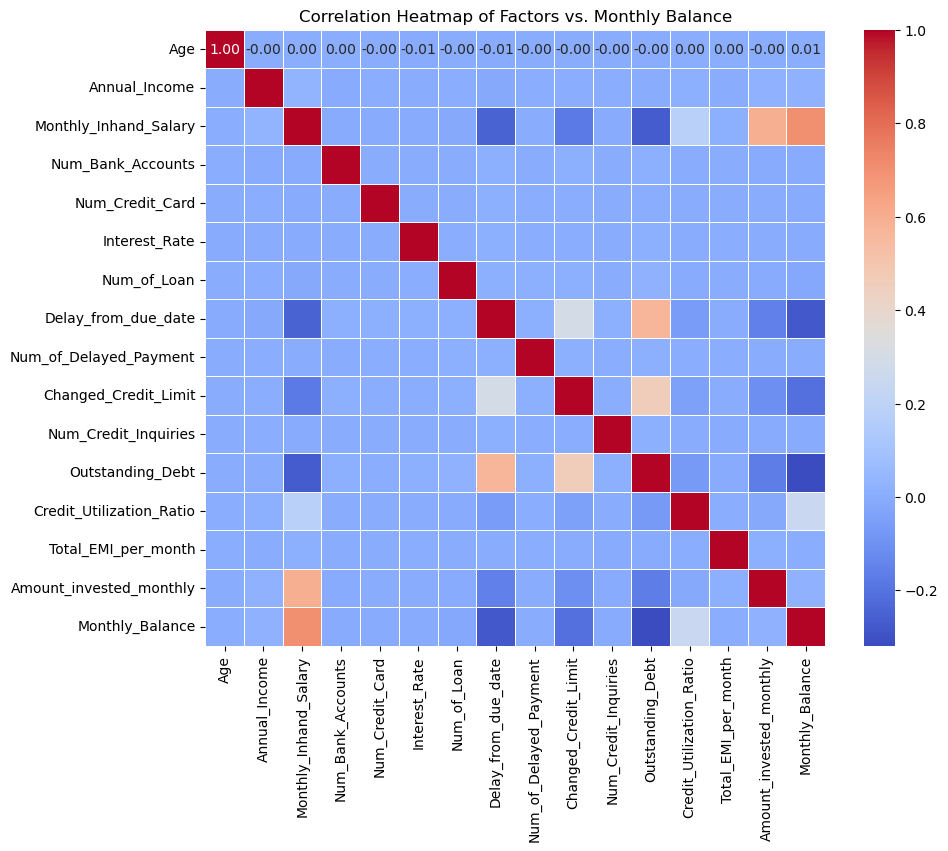

In [ ]:
selected_columns = data.select_dtypes(include=['number'])
# selected_columns = data.select_dtypes(include=['number'])
correlation_matrix = selected_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors vs. Monthly Balance')
plt.show()

In [ ]:
# High Correlation of Monthly_Balance with Monthly_Inhand_Salary
# Therefore we use this column to find missing values of Monthly_BAlance
# we groupby the Monthly_Inhand_Balance and find the mode. use imputer method and find the mode of corresponding
# Monthly Balance and replace it with that.

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

data['Monthly_Balance'] = imputer.fit_transform(data[['Monthly_Balance']])

In [ ]:
# Define a custom function to calculate mode with handling for NaN values
def custom_mode(series):
    mode_values = series.dropna().mode()
    if mode_values.empty:
        return np.nan
    return mode_values.iloc[0]

In [ ]:
#Grouping by monthly_Inhand_Salary
customer_mode_payment = data.groupby('Monthly_Inhand_Salary')['Monthly_Balance'].transform(custom_mode)

# Fill missing values with the corresponding customer's mode payment behavior
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(customer_mode_payment)

In [ ]:
#Checking the transformation for sample data
data[data['Customer_ID']=='CUS_0x942c'][['Monthly_Inhand_Salary','Monthly_Balance']]

,Monthly_Inhand_Salary,Monthly_Balance
99992,3359.415833,261.565962
99993,3359.415833,261.565962
99994,3359.415833,261.565962
99995,3359.415833,261.565962
99996,3359.415833,261.565962
99997,3359.415833,261.565962
99998,3359.415833,261.565962
99999,3359.415833,261.565962


In [ ]:
# Check if all missing values are addressed
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
data.to_csv('No_Missing_Values.csv')

In [ ]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [ ]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,261.565962,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,261.565962,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,261.565962,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,261.565962,Standard


In [ ]:
data['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

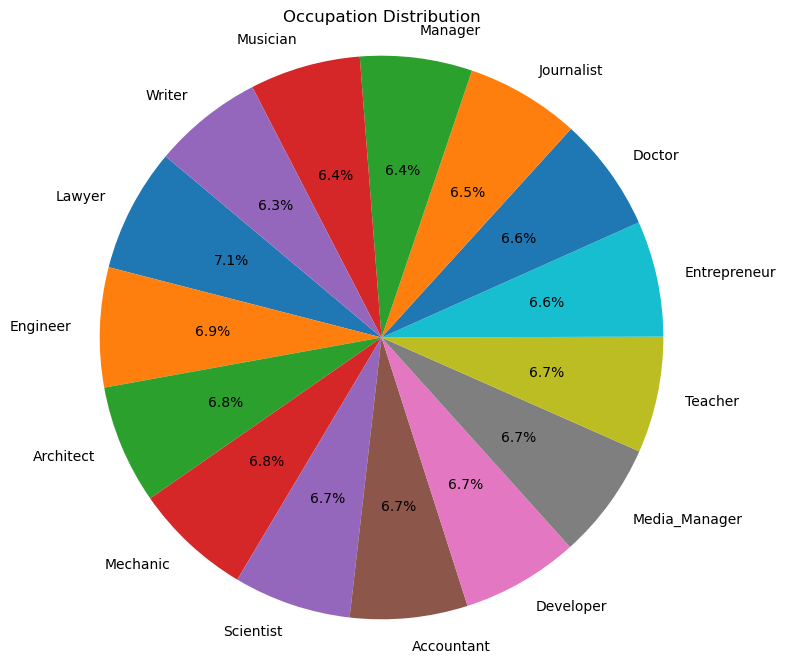

In [ ]:
# Calculate the distribution of occupations
occupation_counts = data['Occupation'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Occupation Distribution')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [ ]:
# Sales = pd.pivot_table(data, values = "NetValue", columns = "BreakStartTime_Day_Local", index = "BreakStartHour")
# weekly_sales.plot()

# Outliers

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,6.847573e+02,14.000000,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,4198.350924,3.187402e+03,303.645417,1626.761667,3095.978333,5961.637500,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,10.761960,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,29.709380,2.180246e+02,0.000000,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,10.389023,6.783585e+00,-6.490000,5.340000,9.400000,14.850000,3.697000e+01


In [2]:
df=data.copy()

In [3]:
# Define the numerical and categorical features
numerical_features = data.select_dtypes(include=['int', 'float']).columns
categorical_features = data.select_dtypes(include=['object']).columns

print("Numerical Features: ", numerical_features)
print("Categorical Features: ", categorical_features)

In [ ]:
def handle_outliers(data, feature):
  print("\n", feature, ": Before data cleaning")
  print("----------------------------------------------------")
  print("Total data points:",data[feature].count())
  print("No. of Null values:",data[feature].isnull().sum())
  print("No. of Unique values:",data[feature].nunique())
  print("Min and Max Values:", data[feature].apply([min, max]), sep='\n', end='\n')

  fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Distribution', f'Violin Plot'], horizontal_spacing=0.2)

  displot = px.histogram(data, x=feature, color_discrete_sequence=['lightseagreen'])
  fig.add_trace(displot['data'][0], row=1, col=1)

  fig.add_trace(go.Violin(y=data[feature], box_visible=True, line_color='black',
                          meanline_visible=True, fillcolor='lightcoral', opacity=0.6,
                          x0=feature), row=1, col=2)

  fig.update_layout(bargap = 0.2, yaxis_zeroline=False, showlegend=False)
  fig.update_xaxes(title_text=feature, row=1, col=1)
  fig.update_yaxes(title_text='Count', row=1, col=1)

  fig.update_layout(title_text=f'{feature}: Before handling outliers')
  fig.show()

  df_dropped = data[data[feature].notna()].groupby('Customer_ID')[feature].apply(list)
  mode_result_min, mode_result_max = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
  mode_min, mode_max = mode_result_min.mode, mode_result_max.mode

  # assign extreme values to NaN
  col = data[feature].apply(lambda x: np.NaN if ((x<0)|(x<mode_min)|(x>mode_max)) else x)

  # fill NaN with mode
  mode_by_group = data.groupby('Customer_ID')[feature].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
  data[feature] = col.fillna(mode_by_group)

  # fill remaining NaN with mean
  data[feature].fillna(data[feature].mean(),inplace=True)

  # replace negative values with 0
  data[feature] = data[feature].apply(lambda x: max(0, x))

  print("\n", feature, ": After data cleaning")
  print("----------------------------------------------------")
  print("Total data points:",data[feature].count())
  print("No. of Null values:",data[feature].isnull().sum())
  print("No. of Unique values:",data[feature].nunique())
  print("Min and Max Values:", data[feature].apply([min, max]), sep='\n', end='\n')

  fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Distribution', f'Violin Plot'], horizontal_spacing=0.2)

  displot = px.histogram(data, x=feature, color_discrete_sequence=['lightseagreen'])
  fig.add_trace(displot['data'][0], row=1, col=1)

  fig.add_trace(go.Violin(y=data[feature], box_visible=True, line_color='black',
                          meanline_visible=True, fillcolor='lightcoral', opacity=0.6,
                          x0=feature), row=1, col=2)

  fig.update_layout(bargap = 0.2, yaxis_zeroline=False, showlegend=False)
  fig.update_xaxes(title_text=feature, row=1, col=1)
  fig.update_yaxes(title_text='Count', row=1, col=1)

  fig.update_layout(title_text=f'{feature}: After handling outliers')
  fig.show()

In [4]:
# Handling outliers in numerical features
for feature in numerical_features:
    handle_outliers(data, feature)

## EDA


In [2]:
df = pd.read_csv('Data_after_handling_outliers.csv')

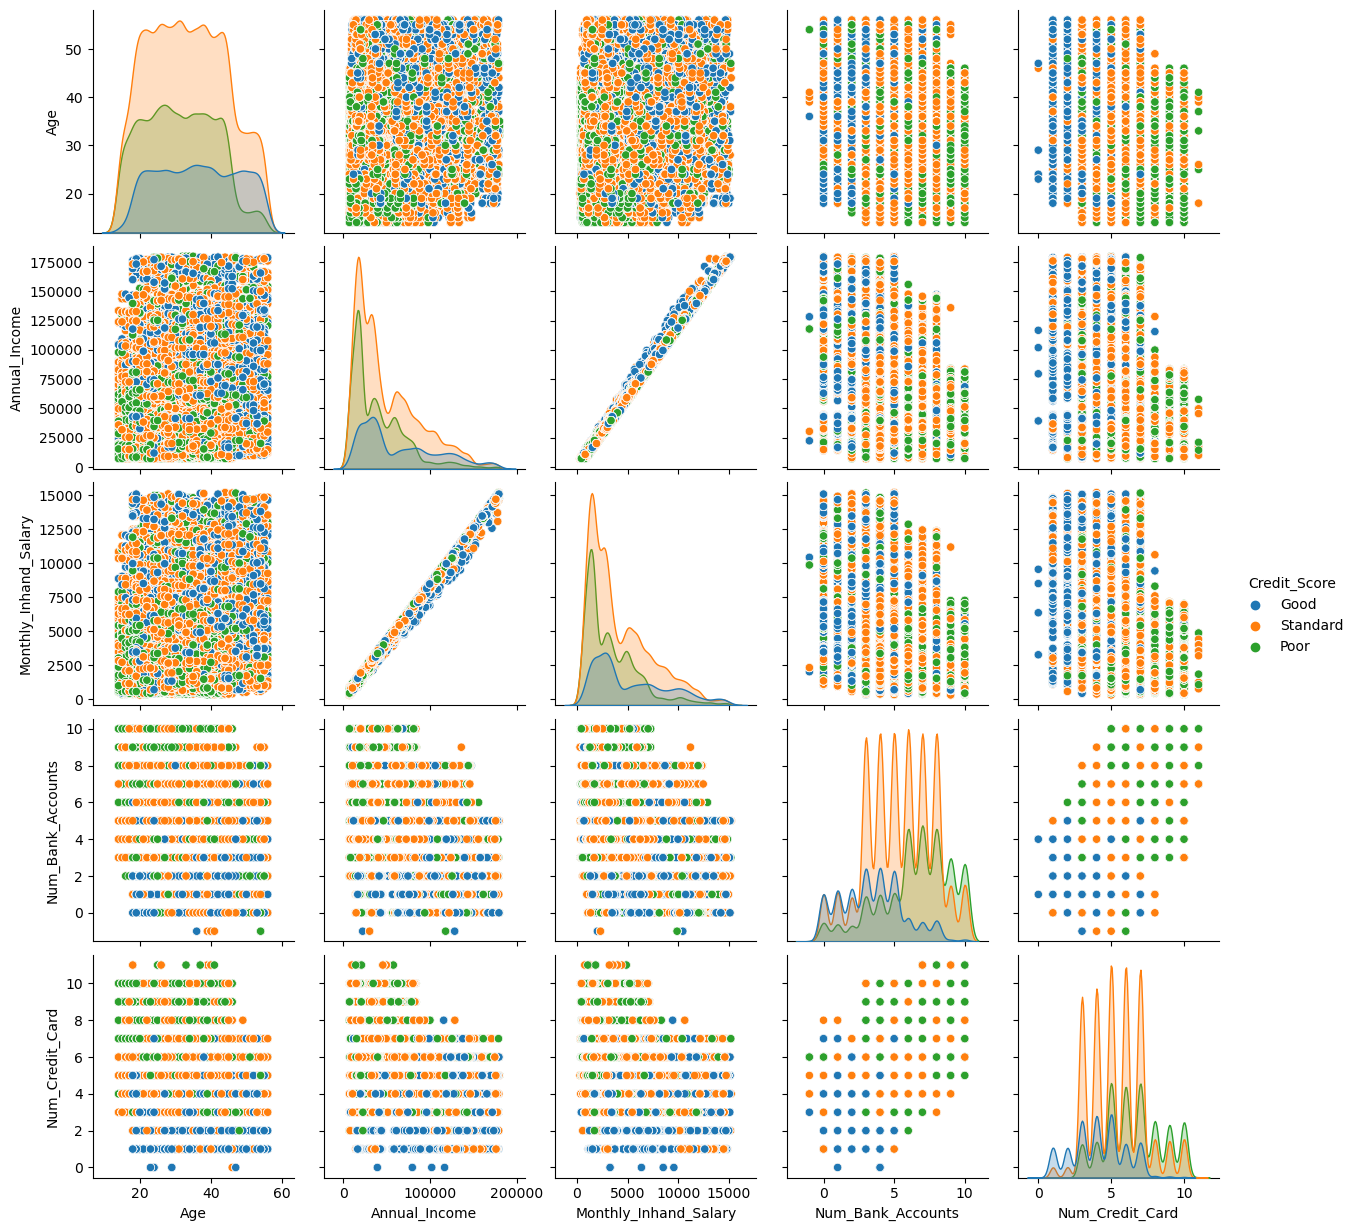

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card']
sns.pairplot(df[numeric_columns + ['Credit_Score']], hue='Credit_Score')
plt.show()


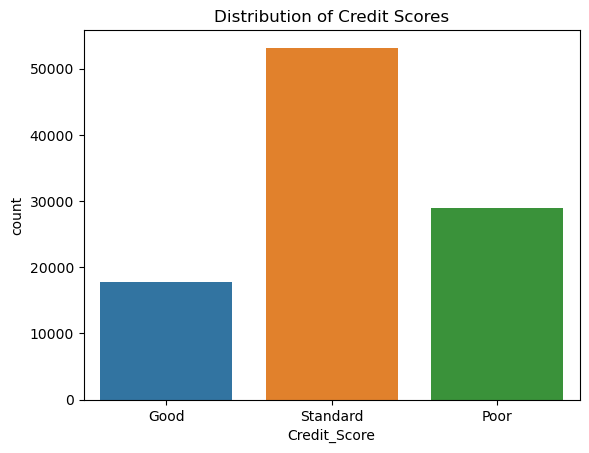

In [4]:
sns.countplot(x='Credit_Score', data=df)
plt.title('Distribution of Credit Scores')
plt.show()


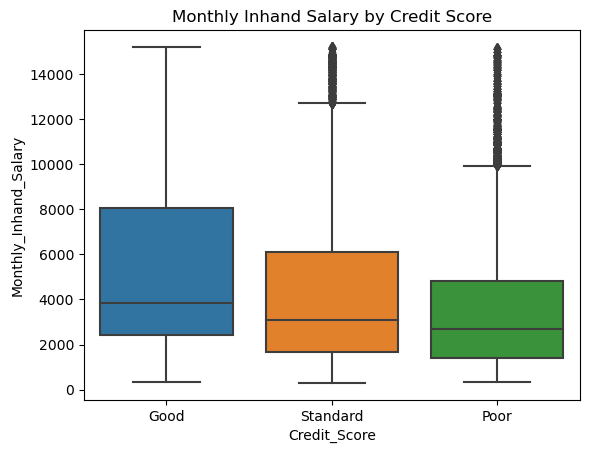

In [5]:
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df)
plt.title('Monthly Inhand Salary by Credit Score')
plt.show()


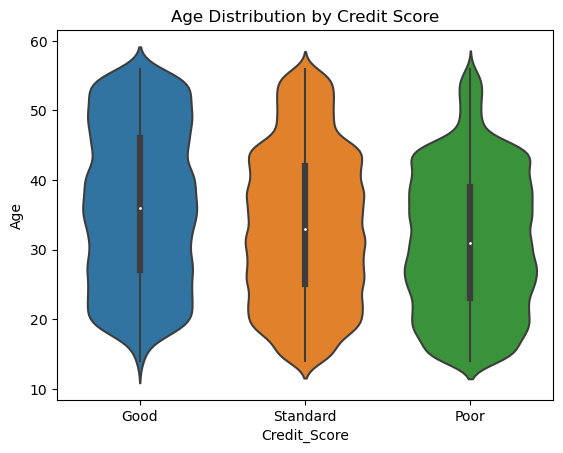

In [6]:
sns.violinplot(x='Credit_Score', y='Age', data=df)
plt.title('Age Distribution by Credit Score')
plt.show()


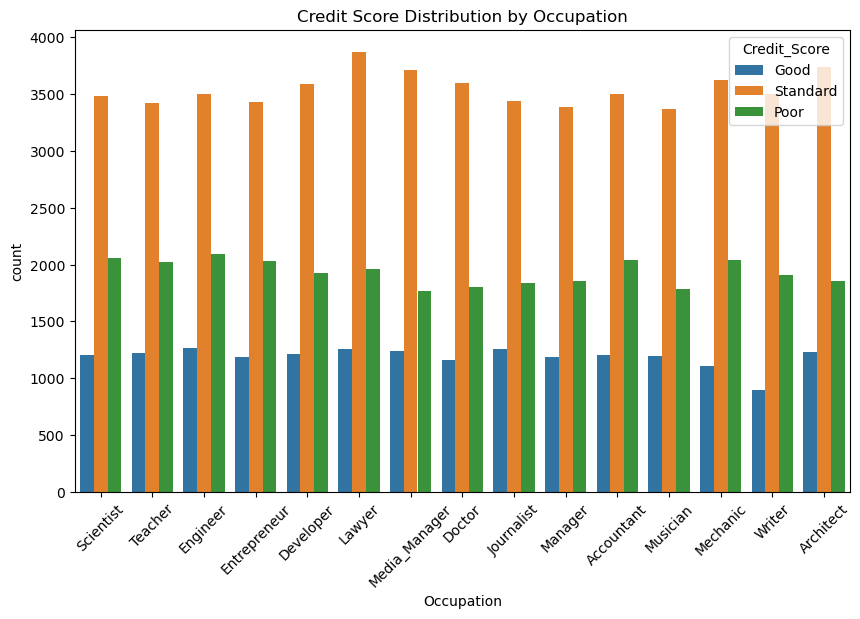

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.title('Credit Score Distribution by Occupation')
plt.xticks(rotation=45)
plt.show()


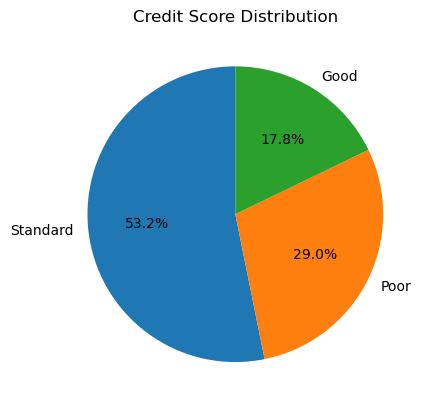

In [8]:
credit_score_distribution = df['Credit_Score'].value_counts()
plt.pie(credit_score_distribution, labels=credit_score_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Credit Score Distribution')
plt.show()


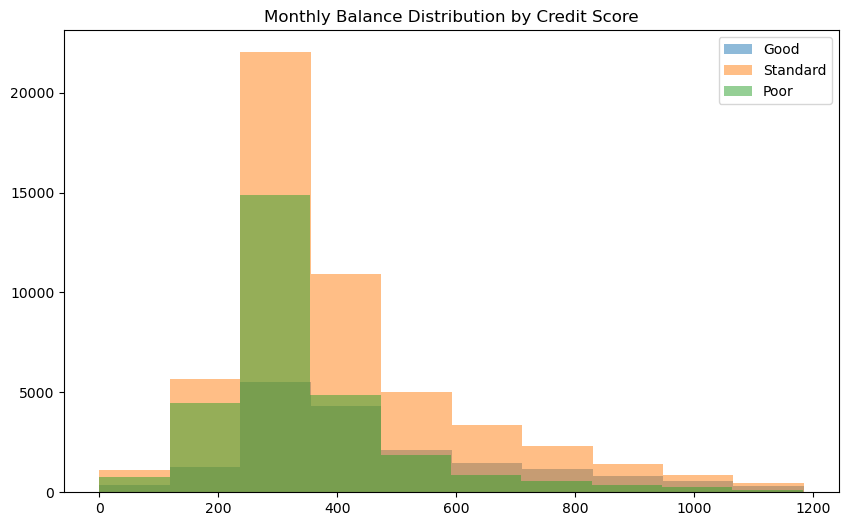

In [9]:
plt.figure(figsize=(10, 6))
for credit_score in df['Credit_Score'].unique():
    plt.hist(df[df['Credit_Score'] == credit_score]['Monthly_Balance'], alpha=0.5, label=credit_score)
plt.legend()
plt.title('Monthly Balance Distribution by Credit Score')
plt.show()


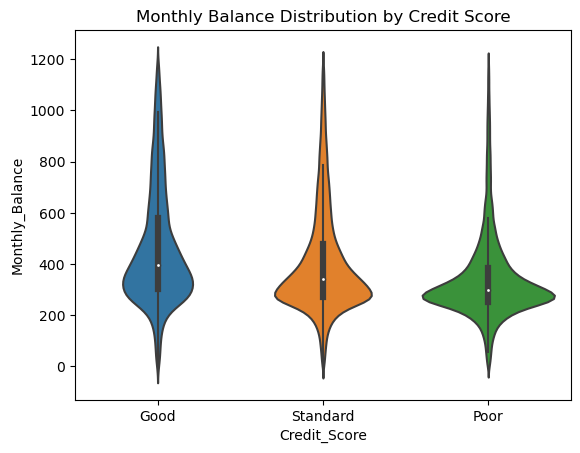

In [10]:
sns.violinplot(x='Credit_Score', y='Monthly_Balance', data=df)
plt.title('Monthly Balance Distribution by Credit Score')
plt.show()


In [11]:
# Extract Years and Months using regular expressions
df['Hist_Years'] = df['Credit_History_Age'].str.extract('(\d+) Years').astype(float)
df['Hist_Months'] = df['Credit_History_Age'].str.extract('(\d+) Months').astype(float)
df['Total_Credit_History'] = df['Hist_Years'] + df['Hist_Months'] / 12

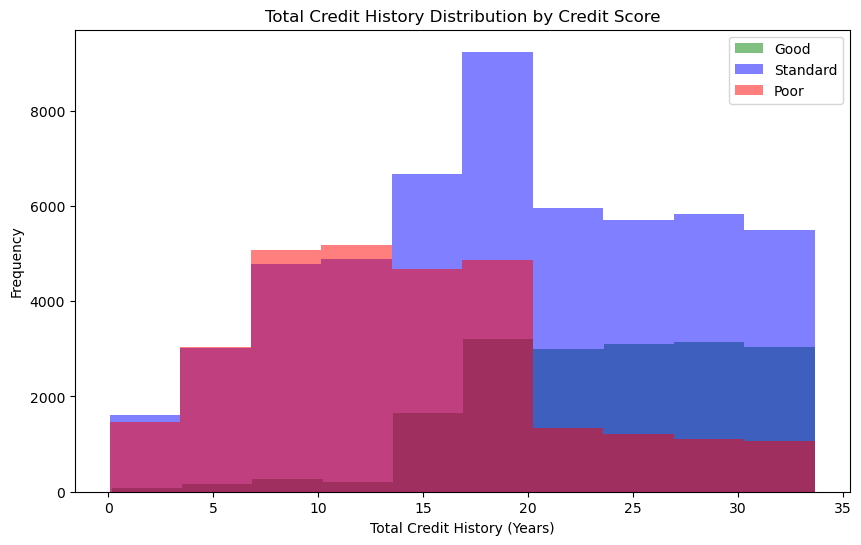

In [12]:
# Define custom colors for each credit score category
colors = {'Good': 'green', 'Poor': 'red', 'Standard': 'blue'}

# Visualize Total_Credit_History distribution by Credit_Score with custom colors
plt.figure(figsize=(10, 6))
for credit_score in df['Credit_Score'].unique():
    plt.hist(df[df['Credit_Score'] == credit_score]['Total_Credit_History'],
             alpha=0.5, label=credit_score, color=colors[credit_score])

plt.legend()
plt.title('Total Credit History Distribution by Credit Score')
plt.xlabel('Total Credit History (Years)')
plt.ylabel('Frequency')
plt.show()

In [13]:
selected_columns=['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_Credit_History',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

### Data Preprocessing - Label Encoding + Data Splitting

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def clean_and_preprocess(df, selected_columns=None, select_all=False):
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}

    # Apply label encoding to categorical columns
    for column in categorical_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    # Selecting columns based on the provided list or flag
    if not select_all and selected_columns is not None:
        selected_columns = [col for col in selected_columns if col in df.columns]
        X = df[selected_columns]
    else:
        X = df.drop('Credit_Score', axis=1)

    y = df['Credit_Score']

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Returning the split data and the label encoder for Credit_Score
    return X_train, X_test, y_train, y_test, label_encoders['Credit_Score']

# Usage
X_train, X_test, y_train, y_test, credit_score_encoder = clean_and_preprocess(df, selected_columns)



## Feature Importance and Selection

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Extracting feature importances
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_columns, 'Importance': feature_importances})

# Displaying the feature importances

sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
important_features_list = sorted_feature_importance_df['Feature'].tolist()

important_features_list

['Outstanding_Debt',
 'Credit_Mix',
 'Interest_Rate',
 'Total_Credit_History',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Monthly_Balance',
 'Amount_invested_monthly',
 'Credit_Utilization_Ratio',
 'Num_Credit_Card',
 'Total_EMI_per_month',
 'Monthly_Inhand_Salary',
 'Annual_Income',
 'Num_of_Delayed_Payment',
 'Type_of_Loan',
 'Age',
 'Month',
 'Num_Bank_Accounts',
 'Occupation',
 'Num_of_Loan',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

### Iterative Feature Reduction and Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# Evaluate the model's performance using cross-validation
scores = cross_val_score(rf_model, X_train, y_train, cv=5)


# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(scores)
std_deviation_score = np.std(scores)

mean_score, std_deviation_score


(0.7998, 0.0038948946175259487)

In [58]:
from sklearn.metrics import accuracy_score

# Initialize the list to keep track of model performance
performance_tracking = []

# Make a copy of the list to manipulate while keeping the original list intact
features_to_use = important_features_list.copy()

# Iterate over all features
for i in range(len(important_features_list)):
    # Define the current set of features
    X_current = X_train[features_to_use]
    X_test_current = X_test[features_to_use]

    # Initialize and train the model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_current, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test_current)

    # Evaluate the model's performance
    performance = accuracy_score(y_test, y_pred)
    performance_tracking.append((features_to_use.copy(), performance))

    # Stop if we're down to one feature
    if len(features_to_use) == 1:
        break

    # Remove the least important feature from the list
    features_to_use.pop()

# The performance_tracking list now holds tuples of (features, performance) for each iteration


In [22]:
from sklearn.metrics import accuracy_score

# Initialize the list to track the number of features and the corresponding model performance
performance_tracking = []

# Make a copy of the list to manipulate while keeping the original list intact
features_to_use = important_features_list.copy()

# Iterate over all features
for i in range(len(important_features_list), 0, -1):
    # Define the current set of features
    X_current = X_train[features_to_use]
    X_test_current = X_test[features_to_use]

    # Initialize and train the model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_current, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test_current)

    # Evaluate the model's performance
    performance = accuracy_score(y_test, y_pred)

    # Record the performance along with the number of features
    performance_tracking.append({'num_features': i, 'performance': performance})

    # Remove the least important feature from the list
    if len(features_to_use) > 1:
        features_to_use.pop()

# At this point, performance_tracking contains the performance history


In [23]:
# Assume baseline_performance is the performance with all features
baseline_performance = performance_tracking[0]['performance']
performance_drop_threshold = 0.05  # 5% drop

# Initialize the optimal feature set to all features initially
optimal_features = important_features_list.copy()
optimal_performance = baseline_performance

for performance_record in performance_tracking:
    performance_drop = (baseline_performance - performance_record['performance']) / baseline_performance

    # If the performance drop is within the acceptable range and the performance is not worse than the optimal
    if performance_drop <= performance_drop_threshold and performance_record['performance'] >= optimal_performance:
        optimal_features = features_to_use[:performance_record['num_features']]
        optimal_performance = performance_record['performance']
    else:
        # Stop if the performance drop is greater than the threshold
        break

# optimal_features now contains the features before the performance drop exceeded the threshold
# optimal_performance is the performance at that point


### Model Performance vs Features used

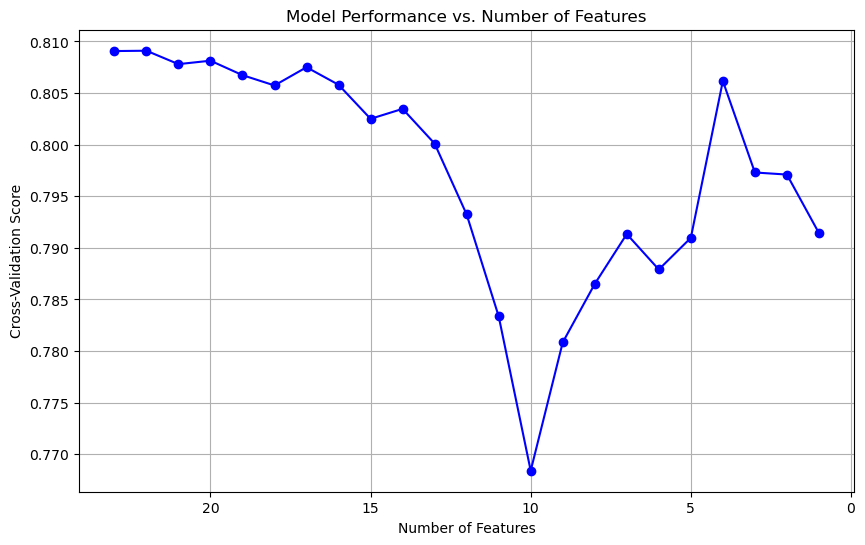

In [24]:
import matplotlib.pyplot as plt

num_features = [record['num_features'] for record in performance_tracking]
cross_val_scores = [record['performance'] for record in performance_tracking]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(num_features, cross_val_scores, marker='o', linestyle='-', color='blue')
plt.title('Model Performance vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.gca().invert_xaxis()  # Optionally invert the x-axis to show the highest number of features on the left
plt.grid(True)
plt.show()


### Model Training and Hyperparameter tuning using Gridsearch

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [19]:
# Models
models = {
    'LogisticRegression': LogisticRegression(multi_class='multinomial', max_iter=200),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Model Parameters
# Model Parameters
model_params = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'DecisionTree': {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'learning_rate': [0.01, 0.05, 0.1],'n_estimators': [100, 150, 200],'max_depth': [3, 5, 7]}
}


In [20]:
# Model Training and Evaluation Function
def train_evaluate_model(name, model, params, x_train, y_train, x_test, y_test):
    grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_
    cv_scores = cross_val_score(best_model, x_train, y_train, cv=3, n_jobs=-1)
    print(f'Cross-Validation Scores for {name}:', cv_scores)
    print(f'Average CV Score for {name}:', np.mean(cv_scores))

    y_predicted = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted, average='weighted')
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')

    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_predicted))
    print('\n\n')

    return acc, f1, precision, recall, y_predicted


### Model Training and Evaluation

In [21]:
# Initialize an empty DataFrame for results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall'])
model_results = {}

# Loop through models and evaluate
for model_name in models:
    if not results['Model'].str.contains(model_name).any():
        model = models[model_name]
        params = model_params.get(model_name, {})
        acc, f1, precision, recall, y_predicted = train_evaluate_model(model_name, model, params, X_train, y_train, X_test, y_test)
        results = results.append({
            'Model': model_name,
            'Accuracy': acc,
            'F1_Score': f1,
            'Precision': precision,
            'Recall': recall
        }, ignore_index=True)
        model_results[model_name] = y_predicted


Cross-Validation Scores for LogisticRegression: [0.54564155 0.5440792  0.54305062]
Average CV Score for LogisticRegression: 0.5442571230795711
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.41      0.05      0.09      5349
           1       0.52      0.29      0.38      8699
           2       0.55      0.84      0.66     15952

    accuracy                           0.54     30000
   macro avg       0.49      0.39      0.38     30000
weighted avg       0.52      0.54      0.48     30000




Cross-Validation Scores for DecisionTree: [0.72036513 0.71658167 0.71585308]
Average CV Score for DecisionTree: 0.7175999604975439
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.57      0.72      0.64      5349
           1       0.74      0.65      0.69      8699
           2       0.76      0.75      0.75     15952

    accuracy                          

#### Model Evaluation - Visualization

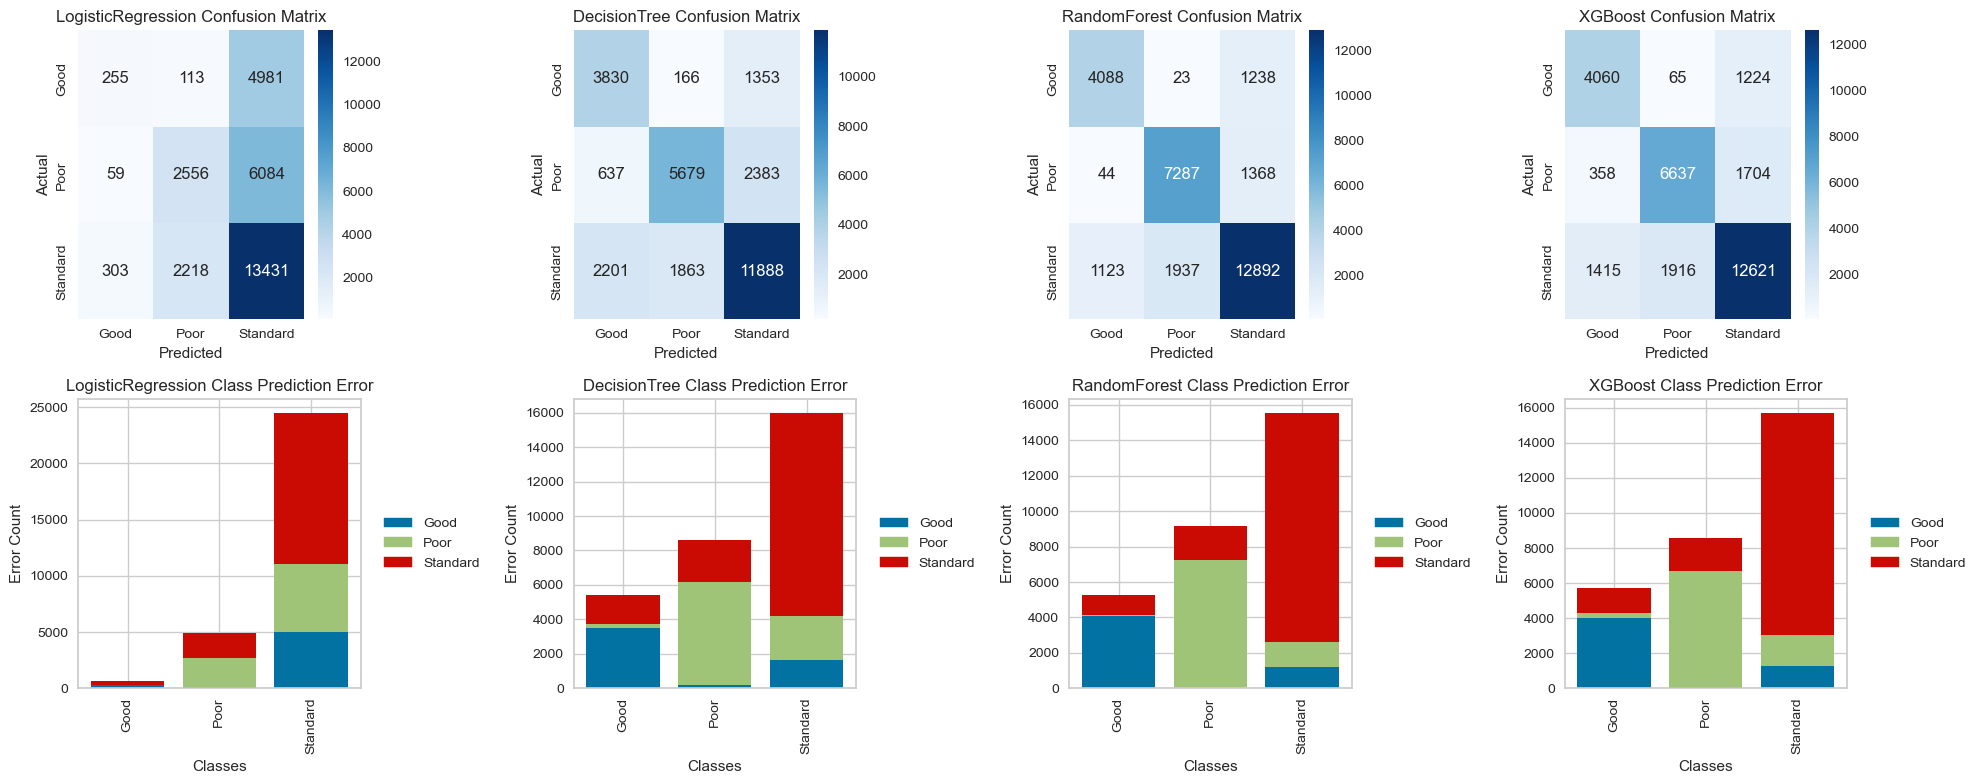

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ClassPredictionError


credit_score_labels = ['Good','Poor','Standard']

# Visualization
n_models = len(models)
fig, axes = plt.subplots(nrows=2, ncols=n_models, figsize=(20, 8))

for idx, (name, model) in enumerate(models.items()):
    y_predicted = model_results[name]
    y_test_labels = credit_score_encoder.inverse_transform(y_test)
    y_predicted_labels = credit_score_encoder.inverse_transform(y_predicted)

    # confusion matrix heatmap
    conf_mat = confusion_matrix(y_test_labels, y_predicted_labels)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=credit_score_labels, yticklabels=credit_score_labels, ax=axes[0, idx])
    axes[0, idx].set_title(f'{name} Confusion Matrix')
    axes[0, idx].set_xlabel('Predicted')
    axes[0, idx].set_ylabel('Actual')

    # Class prediction error
    visualizer = ClassPredictionError(model, classes=credit_score_labels, ax=axes[1, idx])
    visualizer.fit(X_train, y_train)  # Ensure these variables are correctly defined and passed
    visualizer.score(X_test, y_test)  # Same as above
    axes[1, idx].set_title(f'{name} Class Prediction Error')
    axes[1, idx].set_xlabel('Classes')
    axes[1, idx].set_ylabel('Error Count')

plt.tight_layout()
plt.show()
